# Phase 1 Project: Movie Analysis

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they dont know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Importing relevant packages and loading in the data

In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from re import sub



In [4]:
pwd

'/home/datascientist/Rachel'

In [5]:
cd 'C:/Users/kzhg52/Documents/Rachel'

[Errno 2] No such file or directory: 'C:/Users/kzhg52/Documents/Rachel'
/home/datascientist/Rachel


In [6]:
df = pd.read_csv('imdb.title.basics.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
ratings = pd.read_csv('imdb.title.ratings.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
movie_gross = pd.read_csv('bom.movie_gross.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


**Merging all the dataframes**

In [9]:
df_ratings = df.merge(ratings, on = "tconst", how = "inner")
df_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [10]:
all3 = df_ratings.merge(movie_gross, left_on = 'primary_title', right_on = 'title', how = 'inner')
all3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013


In [11]:
all3.shape

(3027, 13)

In [12]:
# dropping missing values from genres
all3.dropna(subset=['genres'], inplace=True)
all3['genres'].isna().sum()

0

In [13]:
all3['genres'] = all3['genres'].apply(lambda x: x.split(','))
all3['genres']
#creating a list of the words to restructure data

0            [Action, Crime, Drama]
1       [Adventure, Drama, Romance]
2                           [Drama]
3                           [Drama]
4        [Adventure, Comedy, Drama]
                   ...             
3022                        [Drama]
3023                      [Romance]
3024                        [Drama]
3025               [Drama, Romance]
3026           [Documentary, Music]
Name: genres, Length: 3020, dtype: object

In [42]:
all3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"[Action, Crime, Drama]",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,[Drama],6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,[Drama],5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013


In [43]:
all3['genres'][0]

['Action', 'Crime', 'Drama']

In [15]:
exploded_genres = all3.explode('genres')
exploded_genres.head()
#spreading the genres column so that it is one row per genre

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,Action,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
0,tt0315642,Wazir,Wazir,2016,103.0,Crime,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
0,tt0315642,Wazir,Wazir,2016,103.0,Drama,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,Adventure,6.1,37886,On the Road,IFC,744000.0,8000000,2012
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,6.1,37886,On the Road,IFC,744000.0,8000000,2012


In [16]:
exploded_genres['studio'].value_counts().head()

Uni.     386
Fox      339
IFC      317
WB       308
Magn.    264
Name: studio, dtype: int64

In [22]:
exploded_genres.groupby('genres').mean()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
genres,,,,,,
Action,2013.953560,115.502347,6.275232,121994.900929,5.945351e+07,2014.102167
Adventure,2014.148064,110.446469,6.478360,157429.473804,9.542850e+07,2014.307517
Animation,2014.131579,96.125828,6.700000,85582.750000,8.854119e+07,2014.493421
Biography,2014.414035,112.263158,6.973333,60004.003509,2.052287e+07,2014.722807
Comedy,2013.592873,105.194777,6.247624,58746.550756,3.418566e+07,2013.822894
Crime,2013.675393,111.315789,6.479581,74822.107330,2.464449e+07,2013.979058
Documentary,2013.555066,89.278027,7.292511,5504.259912,1.300178e+07,2013.916300
Drama,2013.761390,110.227220,6.589351,47360.224374,1.644713e+07,2014.150342
Family,2013.153846,101.622807,6.224786,49260.196581,4.745312e+07,2013.393162


In [23]:
exploded_genres.groupby('genres')['averagerating'].describe() #looking at the distribution of average rating for each genre

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,646.0,6.275232,0.985353,1.7,5.700,6.40,6.900,8.8
Adventure,439.0,6.478360,0.952579,3.2,5.900,6.50,7.200,9.2
Animation,152.0,6.700000,1.006338,3.2,6.100,6.85,7.325,8.4
Biography,285.0,6.973333,0.680093,4.8,6.600,7.00,7.400,8.6
Comedy,926.0,6.247624,1.015017,1.6,5.700,6.30,6.900,8.9
Crime,382.0,6.479581,0.892107,2.6,6.000,6.50,7.100,8.5
Documentary,227.0,7.292511,0.788965,1.6,6.900,7.30,7.700,9.2
Drama,1756.0,6.589351,0.906554,1.6,6.200,6.70,7.200,9.1
Family,117.0,6.224786,1.135623,2.6,5.600,6.40,7.000,8.3


In [24]:
exploded_genres.groupby('genres')['foreign_gross'].describe() #looking at the distribution for foreign gross revenue
#foreign gross does not seem to be read in as numeric--need to convert

,count,unique,top,freq
genres,,,,
Action,470,417,2500000,5
Adventure,370,345,216400000,3
Animation,124,121,1700000,2
Biography,160,141,1200000,5
Comedy,607,467,1200000,6
Crime,247,219,6300000,4
Documentary,89,81,1200000,2
Drama,962,573,7700000,11
Family,87,85,393000,2


In [25]:
exploded_genres.dtypes #checking the data types for each column

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
title               object
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

In [26]:
exploded_genres['new_foreign_gross'] = exploded_genres['foreign_gross'].str.replace(",", "") #removing the commas
exploded_genres['FOREIGN_GROSS'] = exploded_genres['new_foreign_gross'].astype(float) #converting to a float
exploded_genres.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,new_foreign_gross,FOREIGN_GROSS
0,tt0315642,Wazir,Wazir,2016,103.0,Action,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,NaN,NaN
0,tt0315642,Wazir,Wazir,2016,103.0,Crime,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,NaN,NaN
0,tt0315642,Wazir,Wazir,2016,103.0,Drama,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,NaN,NaN
1,tt0337692,On the Road,On the Road,2012,124.0,Adventure,6.1,37886,On the Road,IFC,744000.0,8000000,2012,8000000,8000000.0
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,6.1,37886,On the Road,IFC,744000.0,8000000,2012,8000000,8000000.0


In [27]:
sorted_all3 = exploded_genres.groupby('genres')['FOREIGN_GROSS'].describe().sort_values(by = 'mean', ascending = False)
sorted_all3.head(10)
#working correctly now

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Adventure,370.0,2.102409e+08,2.154927e+08,1019.4,37200000.0,131549999.5,338725000.0,946400000.0
Sci-Fi,114.0,2.076587e+08,2.257018e+08,1019.4,13250000.0,144750000.0,330400000.0,946400000.0
Animation,124.0,2.050703e+08,2.074195e+08,318000.0,43450000.0,128650000.0,341875000.0,875700000.0
Action,470.0,1.453669e+08,1.841130e+08,1010.0,17600000.0,67600000.0,209825000.0,946400000.0
Fantasy,130.0,1.418773e+08,2.024588e+08,68700.0,8550000.0,52250000.0,174650000.0,875700000.0
Family,87.0,9.524706e+07,1.347393e+08,60300.0,10350000.0,42500000.0,129600000.0,718100000.0
Comedy,607.0,7.511500e+07,1.283320e+08,4500.0,5150000.0,23400000.0,82250000.0,875700000.0
Musical,10.0,7.411853e+07,1.052313e+08,24300.0,6200000.0,23950000.0,76350000.0,274400000.0
Thriller,298.0,7.253800e+07,1.270689e+08,1010.0,6225000.0,22400000.0,82400000.0,867600000.0


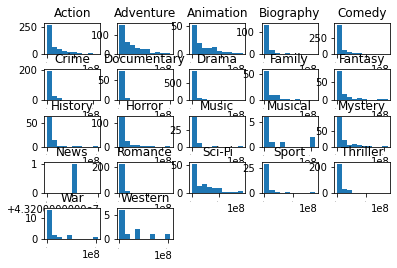

In [28]:
exploded_genres['FOREIGN_GROSS'].hist(xlabelsize = 0.1, by=exploded_genres['genres']);

**Checking domestic gross**

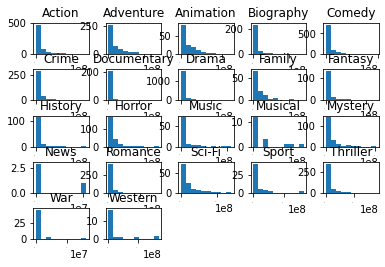

In [30]:
exploded_genres['domestic_gross'].hist(xlabelsize = 0.1, by=exploded_genres['genres']);

In [31]:
sorted_all3 = exploded_genres.groupby('genres')['domestic_gross'].describe().sort_values(by = 'mean', ascending = False)
sorted_all3.head(10)

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Sci-Fi,134.0,1.115925e+08,1.494232e+08,3000.0,5725000.0,51150000.0,146150000.0,700100000.0
Adventure,437.0,9.542850e+07,1.240286e+08,1000.0,3800000.0,47400000.0,133100000.0,700100000.0
Animation,151.0,8.854119e+07,1.126443e+08,600.0,837500.0,46500000.0,143550000.0,608600000.0
Action,640.0,5.945351e+07,1.030226e+08,100.0,450750.0,15900000.0,71250000.0,700100000.0
Fantasy,169.0,5.375420e+07,9.498057e+07,1400.0,280000.0,16000000.0,56300000.0,620200000.0
Family,116.0,4.745312e+07,6.697880e+07,1000.0,544750.0,23750000.0,67300000.0,356500000.0
Sport,53.0,3.991252e+07,8.247052e+07,1700.0,850000.0,7200000.0,36500000.0,412600000.0
Comedy,923.0,3.418566e+07,6.324829e+07,800.0,243000.0,3800000.0,43850000.0,486300000.0
Musical,18.0,3.058807e+07,5.369084e+07,14900.0,106250.0,1327500.0,38450000.0,174300000.0


In [32]:
averagerating_df = exploded_genres.groupby('genres')['averagerating'].describe().sort_values(by = 'mean', ascending = False)
averagerating_df.head(10) #finding the average rating for the top 10 movie genres

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Documentary,227.0,7.292511,0.788965,1.6,6.900,7.30,7.700,9.2
News,4.0,7.100000,0.836660,6.4,6.625,6.85,7.325,8.3
Biography,285.0,6.973333,0.680093,4.8,6.600,7.00,7.400,8.6
History,136.0,6.878676,0.839260,2.5,6.400,7.00,7.400,8.7
Sport,53.0,6.867925,0.969888,2.9,6.400,7.00,7.400,8.6
War,51.0,6.801961,0.969018,4.1,6.450,7.10,7.400,8.7
Music,92.0,6.756522,1.078593,1.6,6.200,6.80,7.500,8.8
Animation,152.0,6.700000,1.006338,3.2,6.100,6.85,7.325,8.4
Drama,1756.0,6.589351,0.906554,1.6,6.200,6.70,7.200,9.1


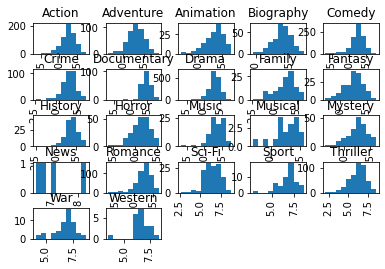

In [33]:
exploded_genres['averagerating'].hist(by=exploded_genres['genres']);

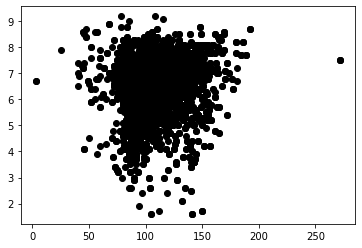

In [35]:
#seeing if run time has anything to do with rating, domestic and foreign gross
plt.plot(exploded_genres['runtime_minutes'],exploded_genres['averagerating'], 'o', color='black');
#average rating

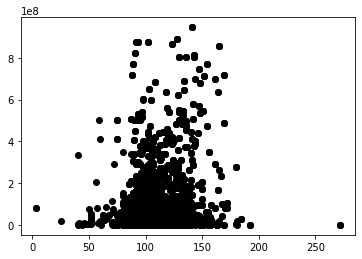

In [36]:
plt.plot(exploded_genres['runtime_minutes'],exploded_genres['FOREIGN_GROSS'], 'o', color='black');
#foreign gross

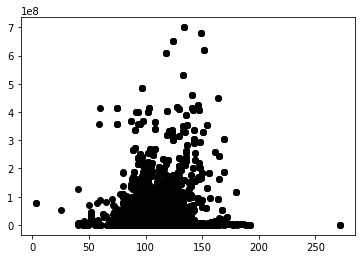

In [37]:
plt.plot(exploded_genres['runtime_minutes'],exploded_genres['domestic_gross'], 'o', color='black');
#domestic gross

**Run time does not appear to correlate with average rating, domestic, or foreign gross**

In [38]:
exploded_genres[['averagerating','runtime_minutes']].corr()

,averagerating,runtime_minutes
averagerating,1.000000,0.174594
runtime_minutes,0.174594,1.000000


In [39]:
exploded_genres[['runtime_minutes','FOREIGN_GROSS']].corr()

,runtime_minutes,FOREIGN_GROSS
runtime_minutes,1.000000,0.211879
FOREIGN_GROSS,0.211879,1.000000


In [40]:
exploded_genres[['runtime_minutes', 'domestic_gross']].corr()

,runtime_minutes,domestic_gross
runtime_minutes,1.0000,0.1496
domestic_gross,0.1496,1.0000


In [41]:
medianrating_df = exploded_genres.groupby('genres')['averagerating'].describe().sort_values(by = '50%', ascending = False).reset_index()
medianrating_df1 = medianrating_df.head(10)

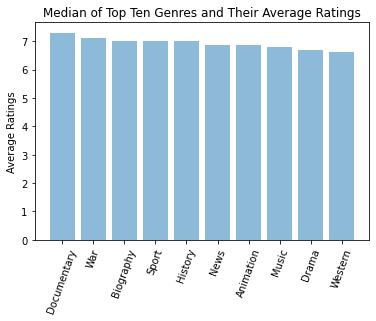

In [42]:
plt.bar(medianrating_df1['genres'], medianrating_df1['50%'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Median of Top Ten Genres and Their Average Ratings')
plt.ylabel('Average Ratings')
plt.show()

In [43]:
mediandomestic_df = exploded_genres.groupby('genres')['domestic_gross'].describe().sort_values(by = '50%', ascending = False).reset_index()
mediandomestic_df1 = mediandomestic_df.head(10)

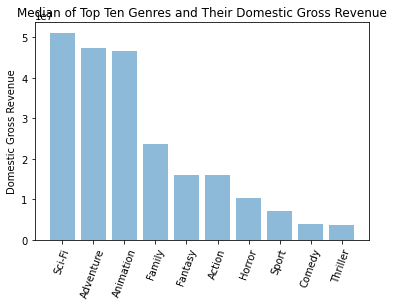

In [44]:
plt.bar(mediandomestic_df1['genres'], mediandomestic_df1['50%'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Median of Top Ten Genres and Their Domestic Gross Revenue')
plt.ylabel('Domestic Gross Revenue')
plt.show()

In [45]:
medianforeign_df = exploded_genres.groupby('genres')['FOREIGN_GROSS'].describe().sort_values(by = '50%', ascending = False).reset_index()
medianforeign_df1 = medianforeign_df.head(10)

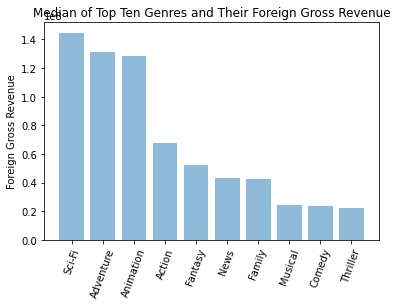

In [46]:
plt.bar(medianforeign_df1['genres'], medianforeign_df1['50%'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Median of Top Ten Genres and Their Foreign Gross Revenue')
plt.ylabel('Foreign Gross Revenue')
plt.show()

**Accounting for Number of Votes**

In [47]:
exploded_genres['numvotes'].describe()

count    6.978000e+03
mean     7.213467e+04
std      1.349915e+05
min      5.000000e+00
25%      3.797000e+03
50%      1.900200e+04
75%      7.822600e+04
max      1.841066e+06
Name: numvotes, dtype: float64

In [48]:
all3_filter = exploded_genres[exploded_genres['numvotes']>=1000]
all3_filter['numvotes'].describe()

count    6.015000e+03
mean     8.363616e+04
std      1.420630e+05
min      1.004000e+03
25%      8.016000e+03
50%      2.970300e+04
75%      9.209600e+04
max      1.841066e+06
Name: numvotes, dtype: float64

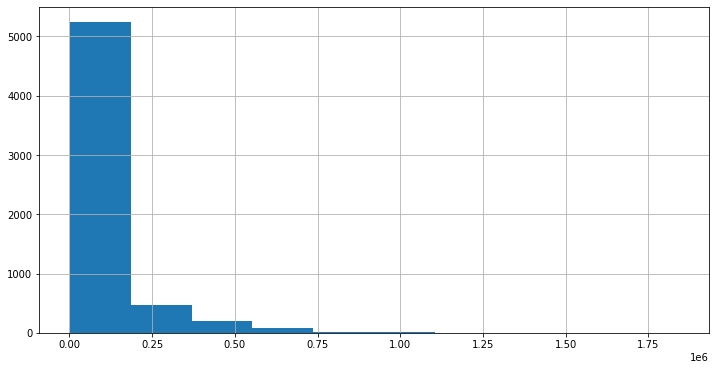

In [49]:
fig, ax = plt.subplots(figsize = (12,6))
all3_filter['numvotes'].hist(ax=ax);


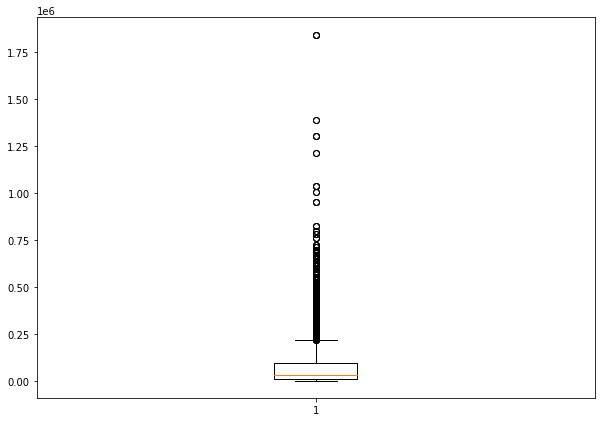

In [77]:
fig = plt.figure(figsize =(10, 7))
 

plt.boxplot(all3_filter['numvotes'])
 

plt.show()

**Does the number of votes correlate with any of the 3 variables?**

In [50]:
exploded_genres[['numvotes', 'domestic_gross']].corr()

,numvotes,domestic_gross
numvotes,1.000000,0.679974
domestic_gross,0.679974,1.000000


In [51]:
exploded_genres[['numvotes', 'FOREIGN_GROSS']].corr()

,numvotes,FOREIGN_GROSS
numvotes,1.000000,0.564015
FOREIGN_GROSS,0.564015,1.000000


In [52]:
exploded_genres[['averagerating', 'numvotes']].corr()

,averagerating,numvotes
averagerating,1.00000,0.31788
numvotes,0.31788,1.00000


In [81]:
#No correlation between the average rating and number of votes
#Positive correlation between number of votes and domestic/foreign gross

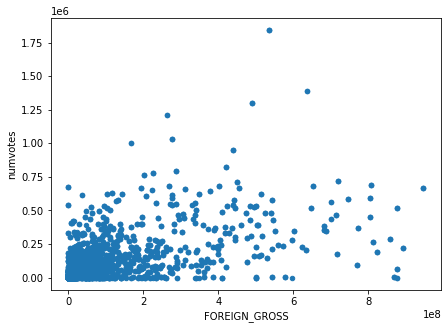

In [53]:
exploded_genres.plot.scatter(x='FOREIGN_GROSS', y = 'numvotes', marker = 'o', figsize = (7,5));

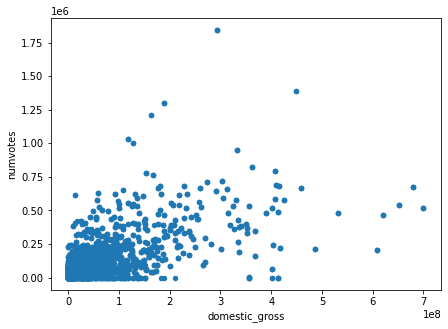

In [83]:
exploded_genres.plot.scatter(x='domestic_gross', y = 'numvotes', marker = 'o', figsize = (7,5));

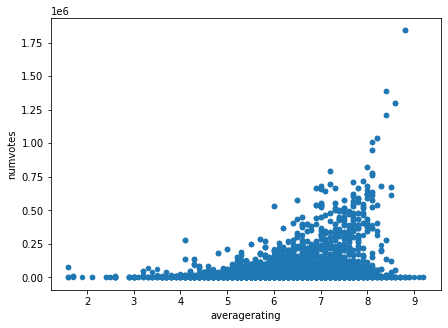

In [84]:
exploded_genres.plot.scatter(x='averagerating', y = 'numvotes', marker = 'o', figsize = (7,5));

In [54]:
sorted_all3 = exploded_genres.groupby('genres')['FOREIGN_GROSS'].describe().sort_values(by = 'mean', ascending = True).reset_index()
bottom_ten_fg = sorted_all3.head(10)

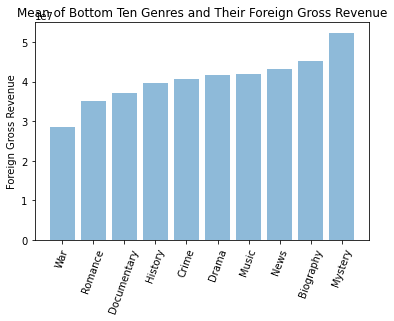

In [55]:
plt.bar(bottom_ten_fg['genres'], bottom_ten_fg['mean'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Mean of Bottom Ten Genres and Their Foreign Gross Revenue')
plt.ylabel('Foreign Gross Revenue')
plt.show()

In [56]:
sorted_all3 = exploded_genres.groupby('genres')['domestic_gross'].describe().sort_values(by = 'mean', ascending = True).reset_index()
bottom_ten_dg = sorted_all3.head(10)

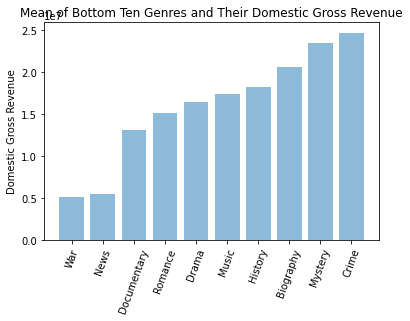

In [57]:
plt.bar(bottom_ten_dg['genres'], bottom_ten_dg['mean'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Mean of Bottom Ten Genres and Their Domestic Gross Revenue')
plt.ylabel('Domestic Gross Revenue')
plt.show()

In [58]:
sorted_all3 = exploded_genres.groupby('genres')['averagerating'].describe().sort_values(by = 'mean', ascending = True).reset_index()
bottom_ten_ar = sorted_all3.head(10)

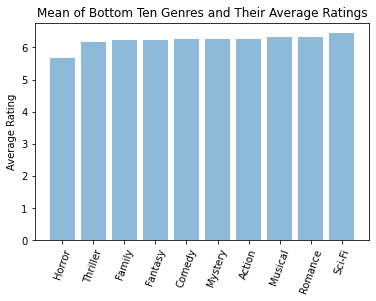

In [59]:
plt.bar(bottom_ten_ar['genres'], bottom_ten_ar['mean'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Mean of Bottom Ten Genres and Their Average Ratings')
plt.ylabel('Average Rating')
plt.show()

**Looking to see which directors and writers are most prosperous**

In [60]:
crew = pd.read_csv('imdb.title.crew.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [61]:
crew.dropna(subset=['directors','writers'], inplace=True)
crew[['directors','writers']].isna().sum()

directors    0
writers      0
dtype: int64

In [62]:
crew['directors'] = crew['directors'].apply(lambda x: x.split(','))
crew.head()

,tconst,directors,writers
0,tt0285252,[nm0899854],nm0899854
2,tt0462036,[nm1940585],nm1940585
3,tt0835418,[nm0151540],"nm0310087,nm0841532"
4,tt0878654,"[nm0089502, nm2291498, nm2292011]",nm0284943
6,tt0996958,[nm2286991],"nm2286991,nm2651190"


In [63]:
crew['writers'] = crew['writers'].apply(lambda x: x.split(','))
crew.head()

,tconst,directors,writers
0,tt0285252,[nm0899854],[nm0899854]
2,tt0462036,[nm1940585],[nm1940585]
3,tt0835418,[nm0151540],"[nm0310087, nm0841532]"
4,tt0878654,"[nm0089502, nm2291498, nm2292011]",[nm0284943]
6,tt0996958,[nm2286991],"[nm2286991, nm2651190]"


In [64]:
exploded_genres1 = crew.explode('directors')
exploded_genres1.head()

,tconst,directors,writers
0,tt0285252,nm0899854,[nm0899854]
2,tt0462036,nm1940585,[nm1940585]
3,tt0835418,nm0151540,"[nm0310087, nm0841532]"
4,tt0878654,nm0089502,[nm0284943]
4,tt0878654,nm2291498,[nm0284943]


In [65]:
exploded_genres1 = exploded_genres1.explode('writers')
exploded_genres1.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,nm0310087
3,tt0835418,nm0151540,nm0841532
4,tt0878654,nm0089502,nm0284943


In [66]:
all3exploded = exploded_genres1.merge(exploded_genres, on = 'tconst', how = 'inner')
all3exploded.head()

,tconst,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,new_foreign_gross,FOREIGN_GROSS
0,tt0835418,nm0151540,nm0310087,The Babymakers,The Babymakers,2012,95.0,Comedy,5.0,8147,The Babymakers,MNE,7900.0,NaN,2012,NaN,NaN
1,tt0835418,nm0151540,nm0841532,The Babymakers,The Babymakers,2012,95.0,Comedy,5.0,8147,The Babymakers,MNE,7900.0,NaN,2012,NaN,NaN
2,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Comedy,6.5,67367,Morning Glory,Par.,31000000.0,29000000,2010,29000000,29000000.0
3,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Drama,6.5,67367,Morning Glory,Par.,31000000.0,29000000,2010,29000000,29000000.0
4,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Romance,6.5,67367,Morning Glory,Par.,31000000.0,29000000,2010,29000000,29000000.0


In [67]:
all3exploded.groupby('primary_title')['directors'].value_counts()

primary_title           directors
'71                     nm1312919     3
1,000 Times Good Night  nm0691547     8
10 Cloverfield Lane     nm0870469     9
10 Years                nm1956691     3
1001 Grams              nm0357584     1
                                     ..
Zookeeper               nm0178997    15
Zoolander 2             nm0001774     5
Zootopia                nm0397174    24
                        nm0601781    24
                        nm1158544    24
Name: directors, Length: 3253, dtype: int64

In [68]:
sorted_all345 = all3exploded.groupby('primary_title')['writers'].describe().sort_values(by = 'count', ascending = False).reset_index()
sorted_all345.head(10)

,primary_title,count,unique,top,freq
0,"Rio, I Love You",540,15,nm1805204,36
1,Movie 43,260,20,nm2695453,13
2,V/H/S,220,11,nm2419470,20
3,Twelve,151,14,nm0643702,13
4,One Day,135,22,nm6157274,9
5,V/H/S/2,98,7,nm2153088,14
6,Moana,96,8,nm2320658,12
7,Heroine,74,9,nm8323925,14
8,Zootopia,72,8,nm1601882,9
9,Madagascar 3: Europe's Most Wanted,72,8,nm0201509,9


In [74]:
new = all3exploded.merge(sorted_all345, on = 'primary_title', how = 'inner').drop_duplicates()
new.head()

,tconst,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,...,studio,domestic_gross,foreign_gross,year,new_foreign_gross,FOREIGN_GROSS,count,unique,top,freq
0,tt0835418,nm0151540,nm0310087,The Babymakers,The Babymakers,2012,95.0,Comedy,5.0,8147,...,MNE,7900.0,NaN,2012,NaN,NaN,2,2,nm0310087,1
1,tt0835418,nm0151540,nm0841532,The Babymakers,The Babymakers,2012,95.0,Comedy,5.0,8147,...,MNE,7900.0,NaN,2012,NaN,NaN,2,2,nm0310087,1
2,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Comedy,6.5,67367,...,Par.,31000000.0,29000000,2010,29000000,29000000.0,3,1,nm0112459,3
3,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Drama,6.5,67367,...,Par.,31000000.0,29000000,2010,29000000,29000000.0,3,1,nm0112459,3
4,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Romance,6.5,67367,...,Par.,31000000.0,29000000,2010,29000000,29000000.0,3,1,nm0112459,3


In [80]:
new1 = new.groupby('directors')['domestic_gross'].describe().sort_values(by = 'mean', ascending = False).head(15)
new1

,count,mean,std,min,25%,50%,75%,max
directors,,,,,,,,
nm1119880,18.0,5.442500e+08,2.486117e+08,4000000.0,652300000.0,652300000.0,652300000.0,652300000.0
nm0751577,75.0,4.965120e+08,1.843038e+08,259800000.0,259800000.0,408100000.0,678800000.0,678800000.0
nm0751648,75.0,4.965120e+08,1.843038e+08,259800000.0,259800000.0,408100000.0,678800000.0,678800000.0
nm0533691,12.0,4.863000e+08,0.000000e+00,486300000.0,486300000.0,486300000.0,486300000.0,486300000.0
nm0923736,15.0,4.590000e+08,0.000000e+00,459000000.0,459000000.0,459000000.0,459000000.0,459000000.0
nm2284484,18.0,4.435395e+08,2.039985e+08,237000.0,532200000.0,532200000.0,532200000.0,532200000.0
nm0426059,9.0,4.356333e+08,2.768500e+08,66500000.0,66500000.0,620200000.0,620200000.0,620200000.0
nm3363032,21.0,4.337286e+08,3.165647e+08,16100000.0,109800000.0,700100000.0,700100000.0,700100000.0
nm4197194,3.0,4.126000e+08,0.000000e+00,412600000.0,412600000.0,412600000.0,412600000.0,412600000.0


In [82]:
new2 = new.groupby('directors')['FOREIGN_GROSS'].describe().sort_values(by = 'mean', ascending = False).head(15)
new2

,count,mean,std,min,25%,50%,75%,max
directors,,,,,,,,
nm0923736,15.0,9.464000e+08,0.000000e+00,946400000.0,946400000.0,946400000.0,946400000.0,946400000.0
nm1601644,12.0,8.757000e+08,0.000000e+00,875700000.0,875700000.0,875700000.0,875700000.0,875700000.0
nm0118333,12.0,8.757000e+08,0.000000e+00,875700000.0,875700000.0,875700000.0,875700000.0,875700000.0
nm1697112,3.0,8.757000e+08,0.000000e+00,875700000.0,875700000.0,875700000.0,875700000.0,875700000.0
nm0943104,12.0,8.676000e+08,0.000000e+00,867600000.0,867600000.0,867600000.0,867600000.0,867600000.0
nm0049633,9.0,7.879333e+08,2.660000e+07,770200000.0,770200000.0,770200000.0,823400000.0,823400000.0
nm3210494,6.0,7.702000e+08,0.000000e+00,770200000.0,770200000.0,770200000.0,770200000.0,770200000.0
nm0005222,27.0,7.355333e+08,6.258729e+07,680600000.0,680600000.0,680600000.0,804200000.0,804200000.0
nm0001392,35.0,7.080143e+08,8.868720e+06,700000000.0,700000000.0,700900000.0,718100000.0,718100000.0


In [94]:
new5 = new1.merge(new2, on = 'directors', how = 'inner').drop_duplicates()
new5.head(15)

,count_x,mean_x,std_x,min_x,25%_x,50%_x,75%_x,max_x,count_y,mean_y,std_y,min_y,25%_y,50%_y,75%_y,max_y
directors,,,,,,,,,,,,,,,,
nm0923736,15.0,459000000.0,0.0,459000000.0,459000000.0,459000000.0,459000000.0,459000000.0,15.0,946400000.0,0.0,946400000.0,946400000.0,946400000.0,946400000.0,946400000.0
nm1697112,3.0,400700000.0,0.0,400700000.0,400700000.0,400700000.0,400700000.0,400700000.0,3.0,875700000.0,0.0,875700000.0,875700000.0,875700000.0,875700000.0,875700000.0
nm1601644,12.0,400700000.0,0.0,400700000.0,400700000.0,400700000.0,400700000.0,400700000.0,12.0,875700000.0,0.0,875700000.0,875700000.0,875700000.0,875700000.0,875700000.0


In [97]:
new3 = new.groupby('writers')['domestic_gross'].describe().sort_values(by = 'mean', ascending = False).head(25)
new3

,count,mean,std,min,25%,50%,75%,max
writers,,,,,,,,
nm1963288,3.0,7.001000e+08,0.000000e+00,700100000.0,700100000.0,700100000.0,700100000.0,700100000.0
nm1119880,6.0,5.350000e+08,1.284957e+08,417700000.0,417700000.0,535000000.0,652300000.0,652300000.0
nm0000341,6.0,5.350000e+08,1.284957e+08,417700000.0,417700000.0,535000000.0,652300000.0,652300000.0
nm0461306,3.0,5.322000e+08,0.000000e+00,532200000.0,532200000.0,532200000.0,532200000.0,532200000.0
nm0317493,12.0,5.201500e+08,1.670175e+08,333200000.0,375650000.0,534300000.0,678800000.0,678800000.0
nm3238648,12.0,5.201500e+08,1.670175e+08,333200000.0,375650000.0,534300000.0,678800000.0,678800000.0
nm1921680,12.0,5.201500e+08,1.670175e+08,333200000.0,375650000.0,534300000.0,678800000.0,678800000.0
nm2757098,12.0,5.201500e+08,1.670175e+08,333200000.0,375650000.0,534300000.0,678800000.0,678800000.0
nm1411347,12.0,5.197500e+08,1.699091e+08,312400000.0,384850000.0,543900000.0,678800000.0,678800000.0


In [96]:
new4 = new.groupby('writers')['FOREIGN_GROSS'].describe().sort_values(by = 'mean', ascending = False).head(25)
new4

,count,mean,std,min,25%,50%,75%,max
writers,,,,,,,,
nm2280850,6.0,8.757000e+08,0.000000e+00,875700000.0,875700000.0,875700000.0,875700000.0,875700000.0
nm1697112,3.0,8.757000e+08,0.000000e+00,875700000.0,875700000.0,875700000.0,875700000.0,875700000.0
nm0026153,6.0,8.757000e+08,0.000000e+00,875700000.0,875700000.0,875700000.0,875700000.0,875700000.0
nm3827960,2.0,8.757000e+08,0.000000e+00,875700000.0,875700000.0,875700000.0,875700000.0,875700000.0
nm0118333,6.0,8.757000e+08,0.000000e+00,875700000.0,875700000.0,875700000.0,875700000.0,875700000.0
nm8127867,3.0,8.676000e+08,0.000000e+00,867600000.0,867600000.0,867600000.0,867600000.0,867600000.0
nm0943104,3.0,8.676000e+08,0.000000e+00,867600000.0,867600000.0,867600000.0,867600000.0,867600000.0
nm3146222,3.0,8.676000e+08,0.000000e+00,867600000.0,867600000.0,867600000.0,867600000.0,867600000.0
nm8127866,3.0,8.676000e+08,0.000000e+00,867600000.0,867600000.0,867600000.0,867600000.0,867600000.0


In [98]:
new6 = new3.merge(new4, on = 'writers', how = 'inner')
new6

,count_x,mean_x,std_x,min_x,25%_x,50%_x,75%_x,max_x,count_y,mean_y,std_y,min_y,25%_y,50%_y,75%_y,max_y
writers,,,,,,,,,,,,,,,,
nm1963288,3.0,700100000.0,0.0,700100000.0,700100000.0,700100000.0,700100000.0,700100000.0,3.0,646900000.0,0.0,646900000.0,646900000.0,646900000.0,646900000.0,646900000.0
nm2137463,3.0,409000000.0,0.0,409000000.0,409000000.0,409000000.0,409000000.0,409000000.0,3.0,805800000.0,0.0,805800000.0,805800000.0,805800000.0,805800000.0,805800000.0
nm1979137,3.0,409000000.0,0.0,409000000.0,409000000.0,409000000.0,409000000.0,409000000.0,3.0,805800000.0,0.0,805800000.0,805800000.0,805800000.0,805800000.0,805800000.0
nm4022192,6.0,408100000.0,0.0,408100000.0,408100000.0,408100000.0,408100000.0,408100000.0,6.0,745200000.0,0.0,745200000.0,745200000.0,745200000.0,745200000.0,745200000.0


**Checking which months are most popular to release a movie**

In [158]:
budget = pd.read_csv('tn.movie_budgets.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [164]:
budget.loc[:, 'date'] = pd.to_datetime(budget['release_date']) 
budget.loc[:, 'month'] = budget['date'].dt.month

In [165]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date,month,ww_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009-12-18,12,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,5,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019-06-07,6,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-05-01,5,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-15,12,1316721747


In [166]:
budget.loc[:, 'ww_gross'] = budget.loc[:, 'worldwide_gross'].str.replace('\W', '')
budget.loc[:, 'ww_gross'] = budget.loc[:, 'ww_gross'].astype(int)
budget = budget.sort_values(by = ['month', 'ww_gross'])
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date,month,ww_gross
2327,28,"Jan 1, 1970",Waterloo,"$25,000,000",$0,$0,1970-01-01,1,0
2328,29,"Jan 10, 2014",The Adventurer: The Curse of the Midas Box,"$25,000,000",$0,$0,2014-01-10,1,0
4387,88,"Jan 30, 2007",Farce of the Penguins,"$5,000,000",$0,$0,2007-01-30,1,0
4391,92,"Jan 27, 2015",Born of War,"$5,000,000",$0,$0,2015-01-27,1,0
4392,93,"Jan 9, 2015",Let's Kill Ward's Wife,"$5,000,000",$0,$0,2015-01-09,1,0


In [167]:
budget_month =  budget.groupby('month')['ww_gross'].describe().reset_index().sort_values(by = 'mean')
budget_month.head()

,month,count,mean,std,min,25%,50%,75%,max
0,1,347.0,4.656382e+07,6.600859e+07,0.0,2623897.50,20169934.0,66716257.00,5.175991e+08
8,9,493.0,4.669369e+07,7.506859e+07,0.0,2256606.00,18535575.0,52302978.00,6.974580e+08
9,10,573.0,4.946456e+07,8.541839e+07,0.0,3336053.00,16628751.0,60512680.00,8.536286e+08
3,4,454.0,5.992026e+07,1.584558e+08,0.0,2845301.50,20068010.0,62185653.50,2.048134e+09
7,8,496.0,6.097841e+07,9.757729e+07,0.0,3258553.75,24202936.5,76302949.25,7.708675e+08


In [150]:
from ipywidgets import (widgets, interact, interactive, interact_manual, fixed)

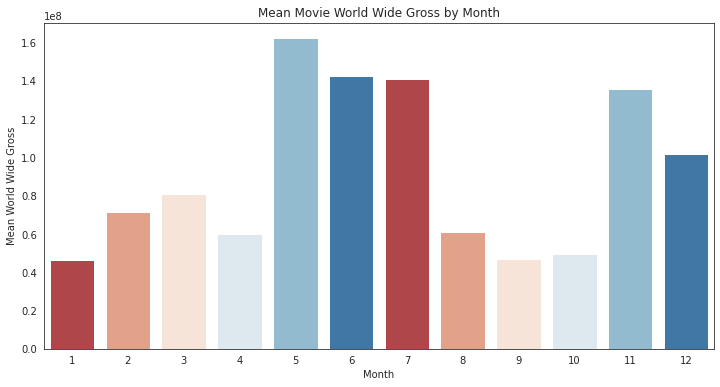

In [180]:
pal = sns.color_palette('RdBu')
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x = 'month', y = 'mean', palette = pal, ax = ax, data = budget_month)
ax.set_xlabel('Month')
ax.set_ylabel('Mean World Wide Gross')
ax.set_title('Mean Movie World Wide Gross by Month');

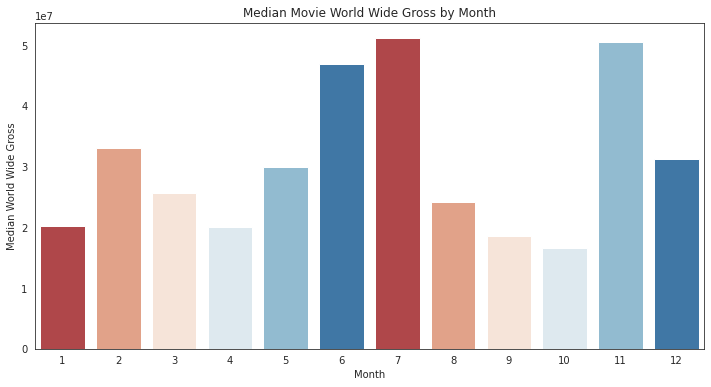

In [179]:
pal = sns.color_palette('RdBu')
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x = 'month', y = '50%', palette = pal, ax = ax, data = budget_month)
ax.set_xlabel('Month')
ax.set_ylabel('Median World Wide Gross')
ax.set_title('Median Movie World Wide Gross by Month');

In [170]:
@interact 
def plot_means(month = budget['month'].unique()):
    
    df = budget[budget['month'] == month]
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.set_style('white')  
    pal = sns.color_palette('RdBu')
    sns.histplot(x = 'ww_gross',  palette = pal, ax = ax, data = df)
    ax.set_xlabel('World Wide Gross')
    ax.set_ylabel('Frequency')
    ax.set_title('Worldwide Gross Revenue for Month {}'.format(month))

    plt.show()

interactive(children=(Dropdown(description='month', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1),…

In [ ]:
#Recommend releasing movies in June or July
#Recommend Sci-fi and adventure movies, and avoid war and documentary movies
#Recommend using nm1963288, nm2137463, nm1979137, and nm4022192 as writers and 